---
Rapid MLR
---
---

### Import Necessary Functions

In [3]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression

import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [4]:
# Load the dataset
df = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 4/Rapid /Palmer Penguins/penguins.csv')

# Display the first few rows of the dataframe
df.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [6]:
df.describe()


,id,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,171.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,0.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,85.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,171.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
df.describe(include="O")

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [8]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [10]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify that there are no missing values left
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


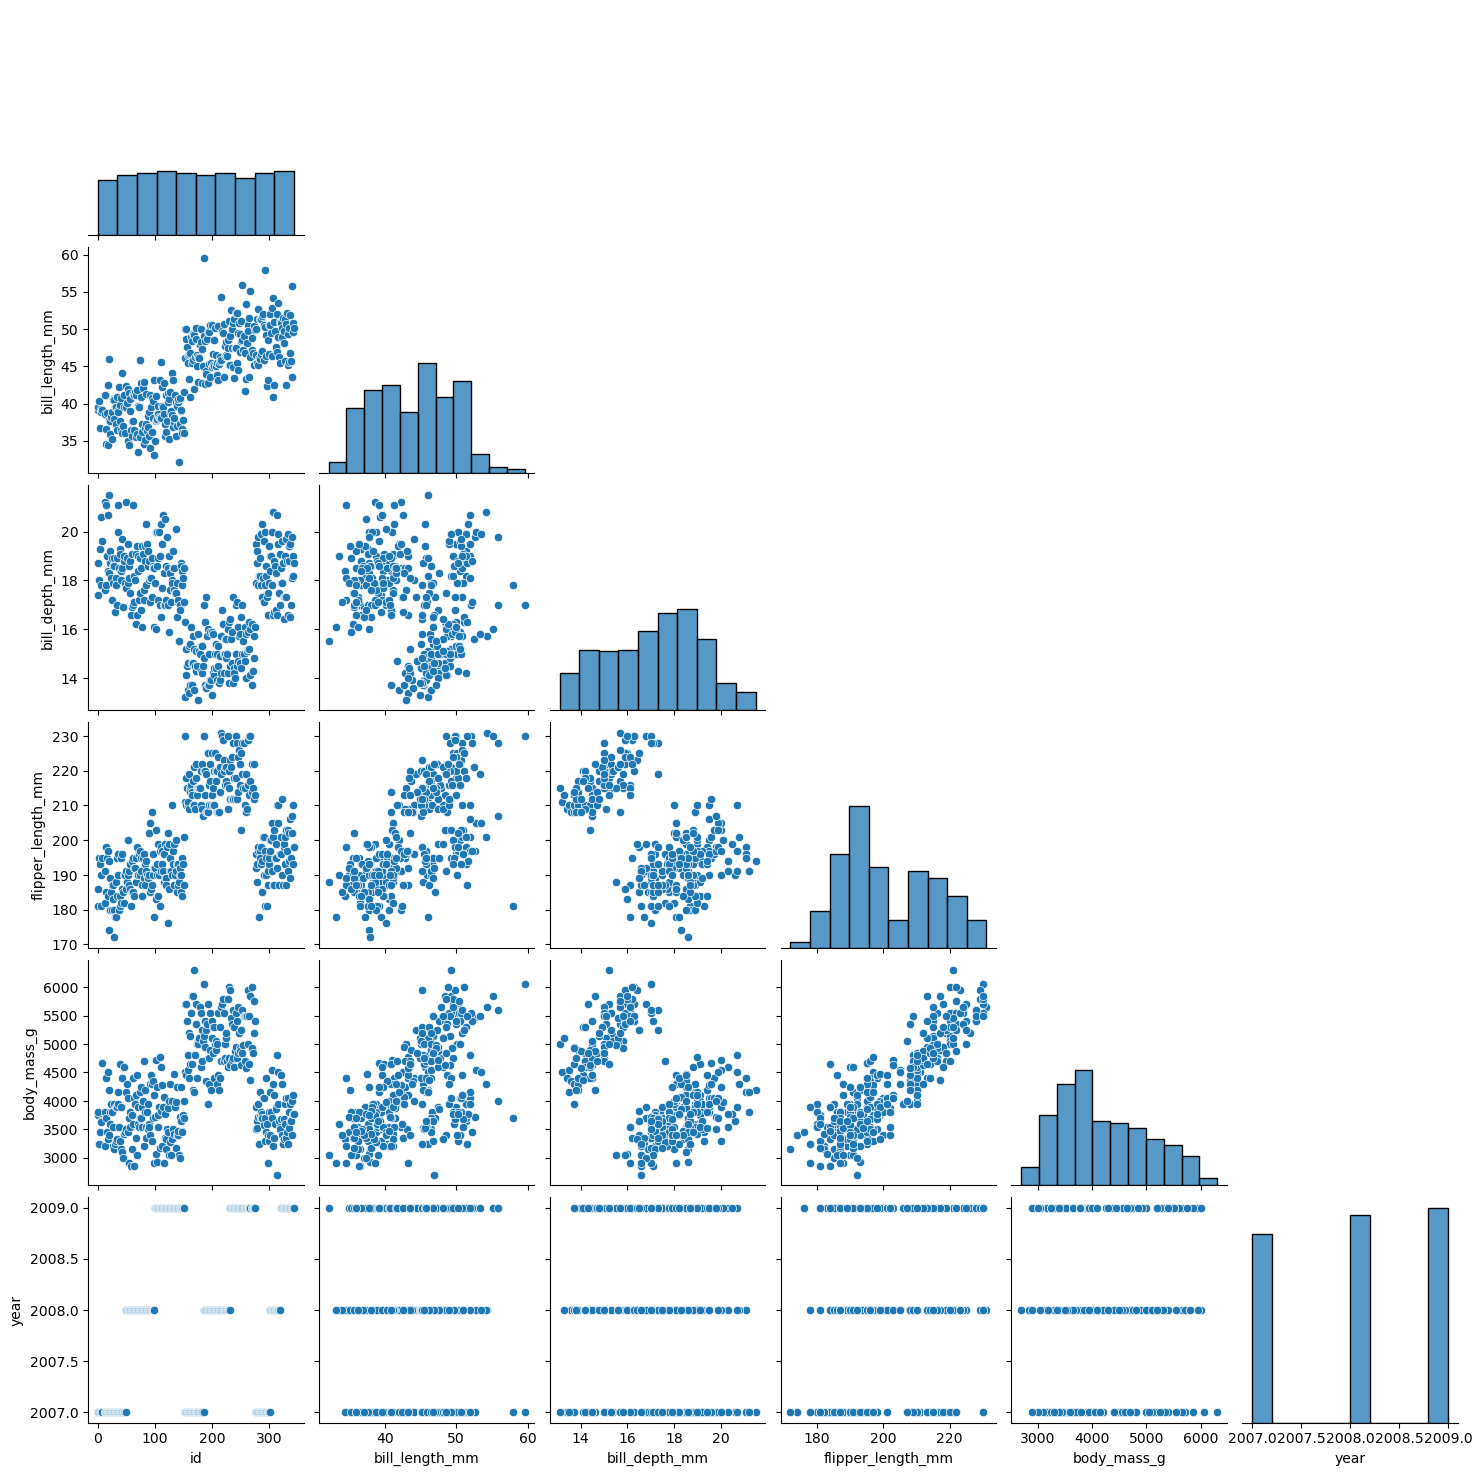

In [11]:
sns.pairplot(data=df, palette="rocket", corner=True);

### Descriptive Analyses


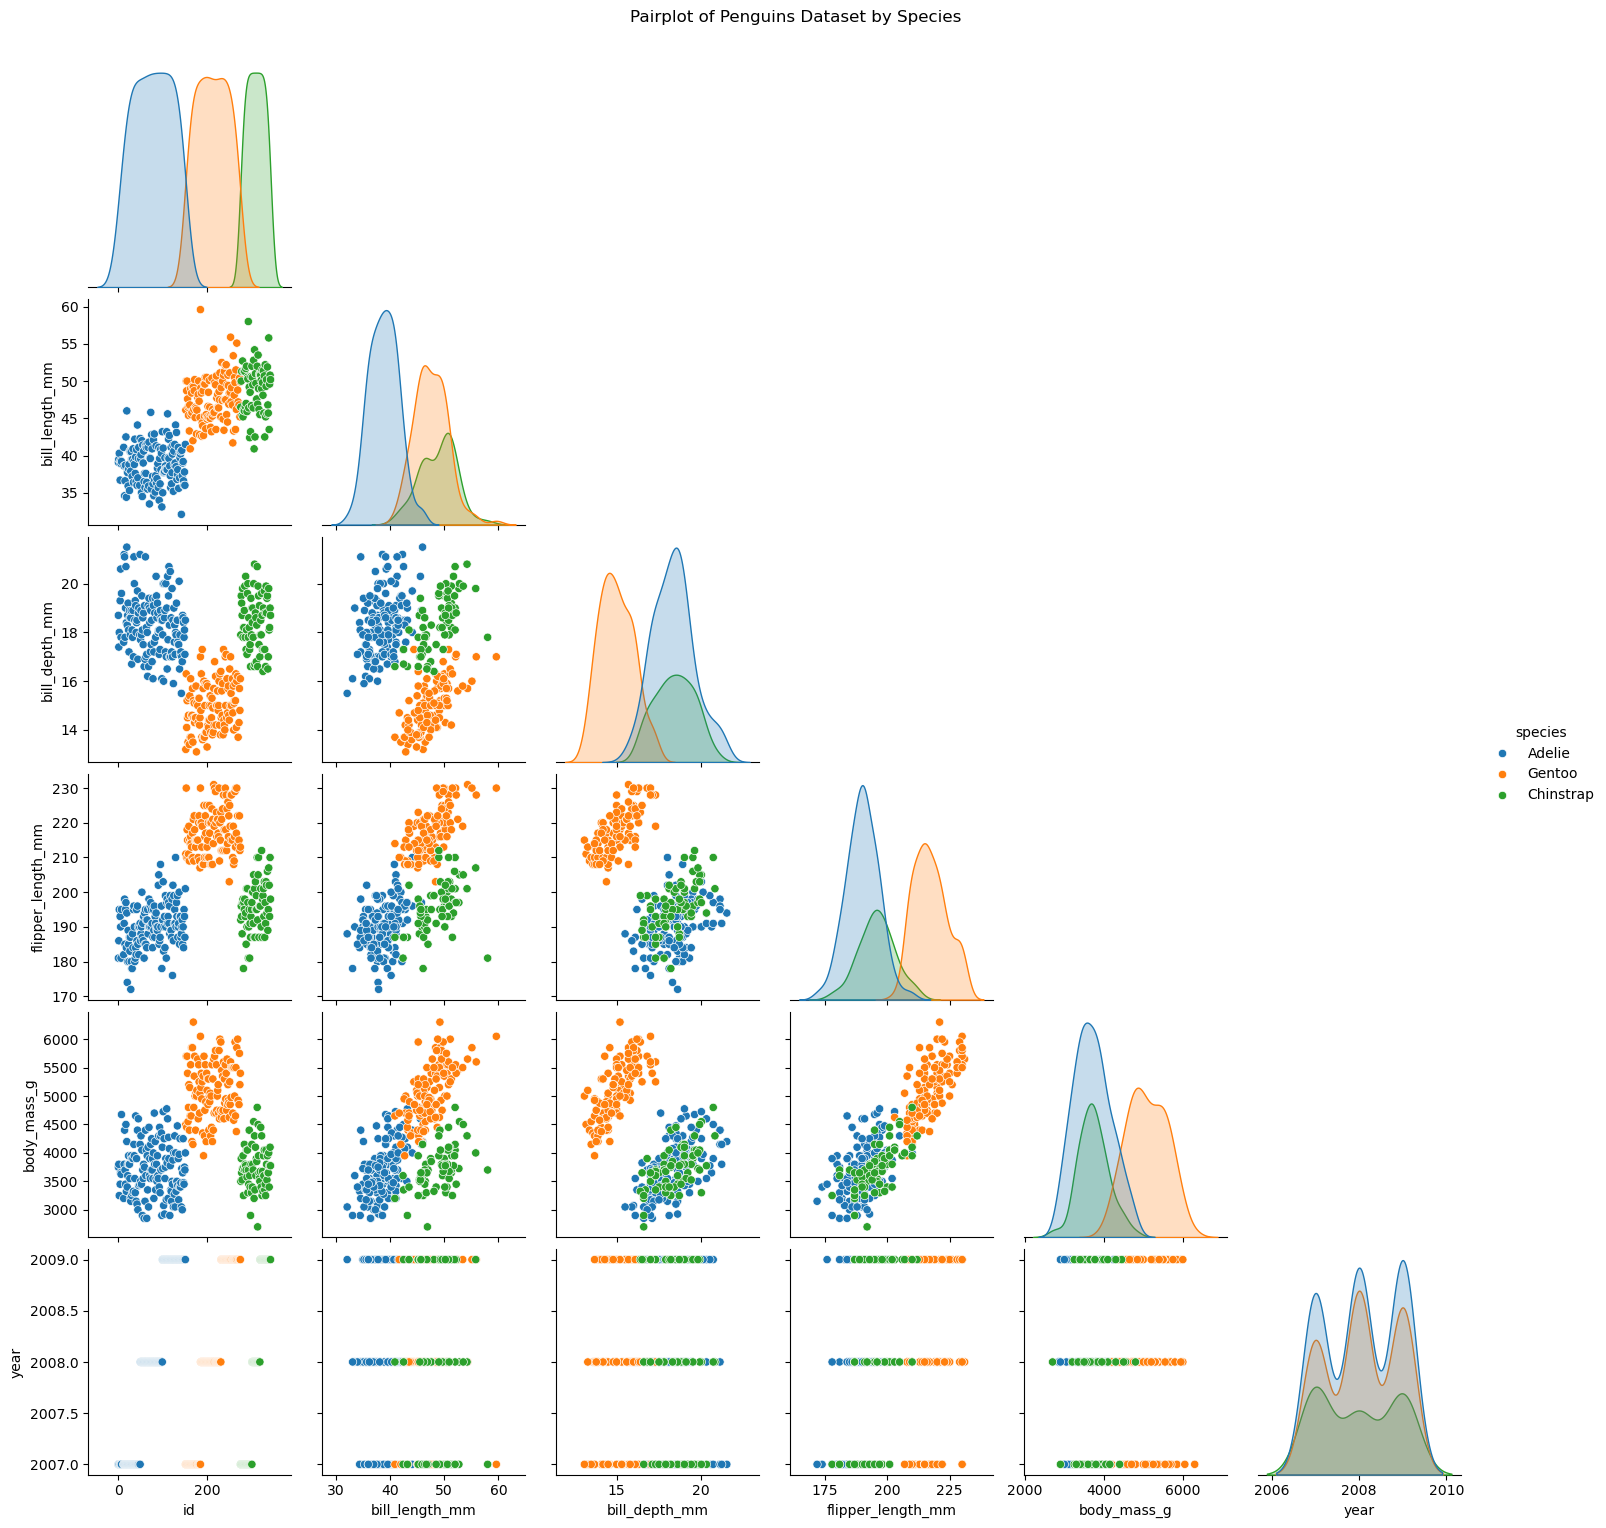

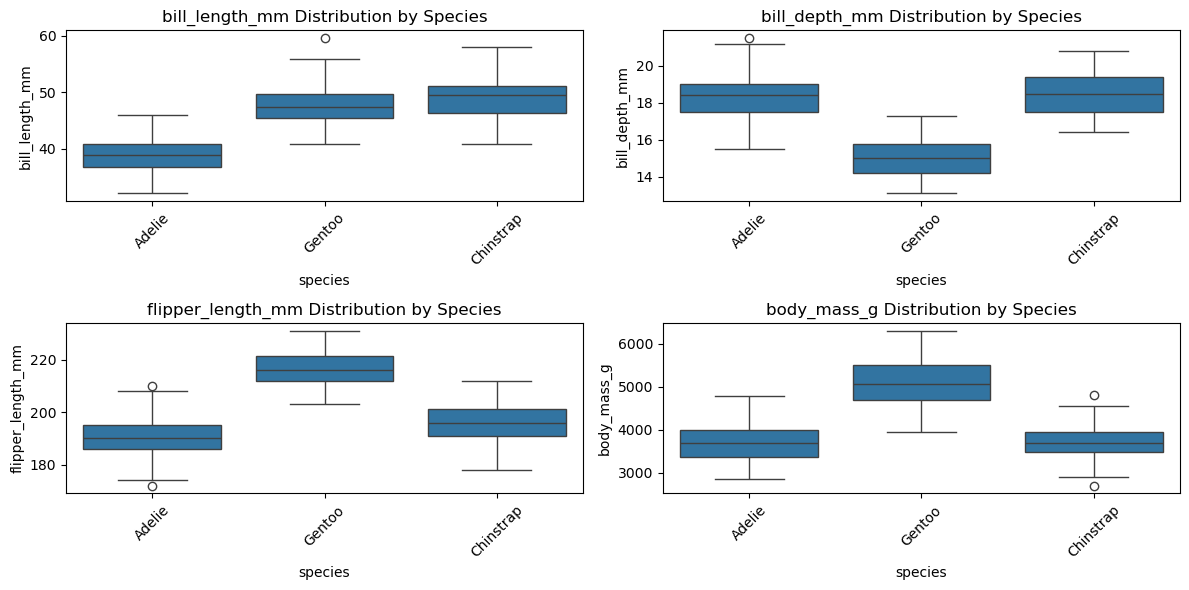

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot reconfirm- add color by species
sns.pairplot(df, hue='species', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Penguins Dataset by Species", y=1.02)
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
for idx, col in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f"{col} Distribution by Species")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


>The plots show clear differences between penguin species in terms of bill length, bill depth, flipper length, and body mass. Gentoo penguins are heavier with longer flippers, while Adelie penguins are smaller with shorter bills. The clusters and boxplots confirm species-specific traits, making the species distinguishable.

#### Summary Statistics and Distributions

               id  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  333.000000      333.000000     333.000000         333.000000   
mean   173.324324       43.992793      17.164865         200.966967   
std     98.386547        5.468668       1.969235          14.015765   
min      0.000000       32.100000      13.100000         172.000000   
25%     89.000000       39.500000      15.600000         190.000000   
50%    172.000000       44.500000      17.300000         197.000000   
75%    258.000000       48.600000      18.700000         213.000000   
max    343.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   333.000000   333.000000  
mean   4207.057057  2008.042042  
std     805.215802     0.812944  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4775.000000  2009.000000  
max    6300.000000  2009.000000  


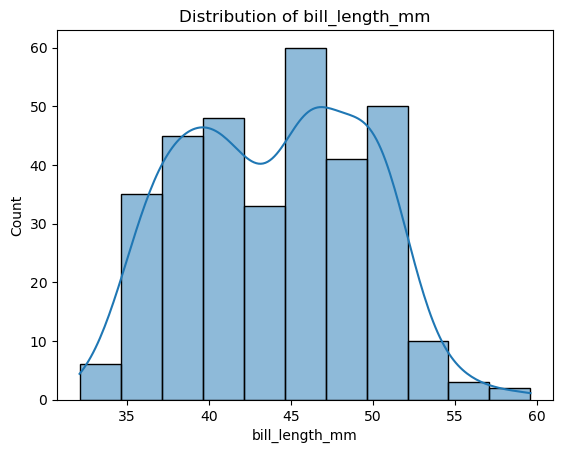

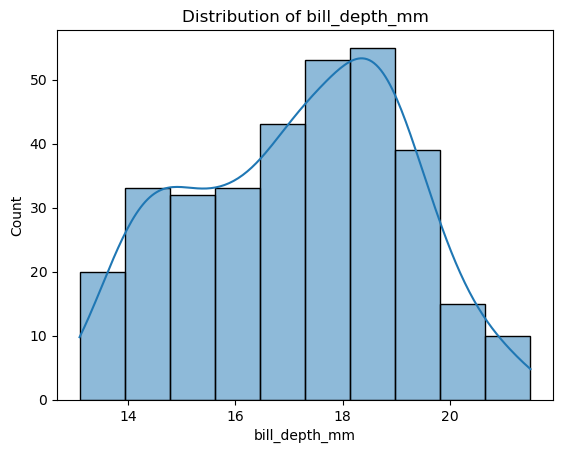

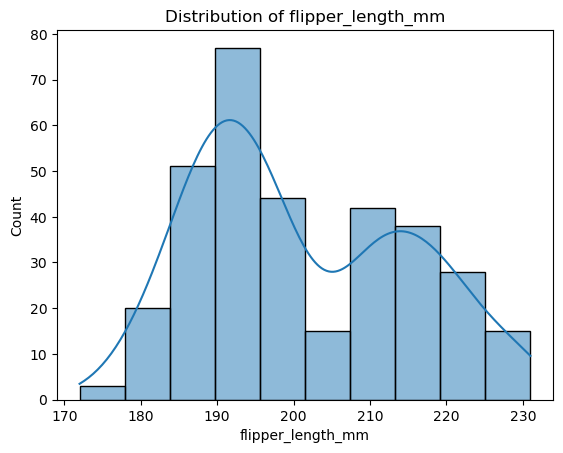

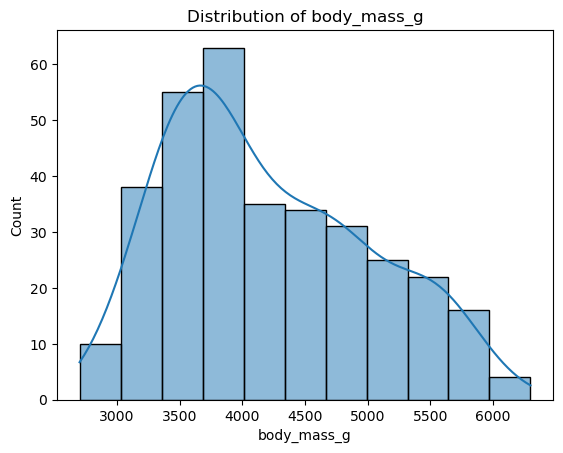

In [16]:
# Summary statistics
print(df.describe())

# Distribution of numerical variables
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


>The histograms show the distributions of key features in the dataset. The bill length and flipper length distributions are approximately normal, while body mass has a slight right skew. The bill depth appears more evenly distributed. Each feature varies significantly, suggesting these measurements can help distinguish between penguin species.

#### Correlation Analysis

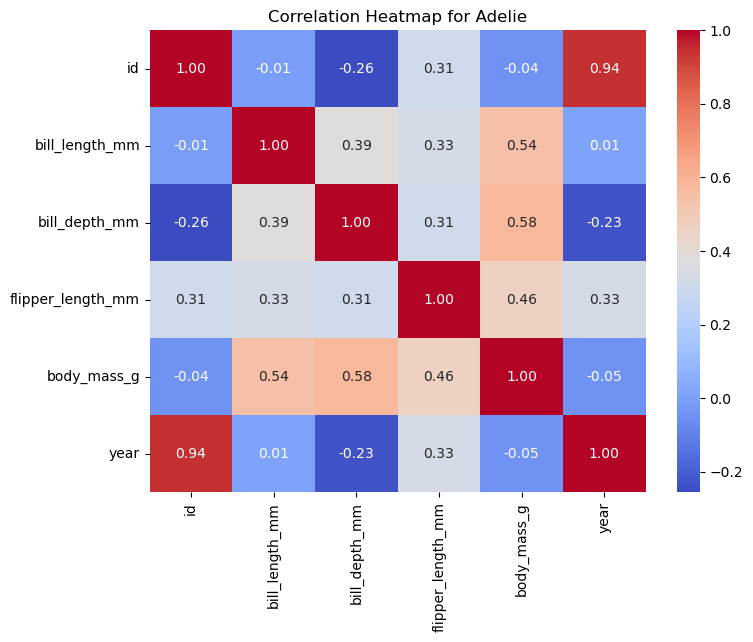

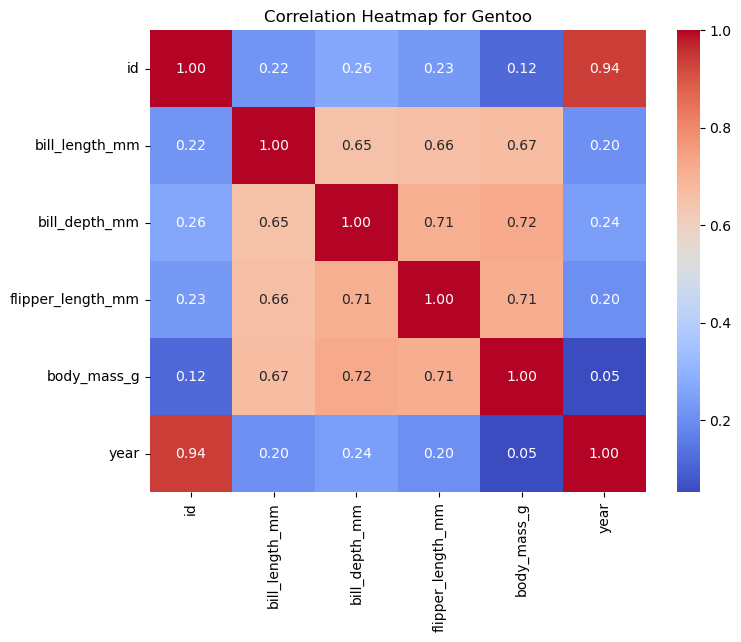

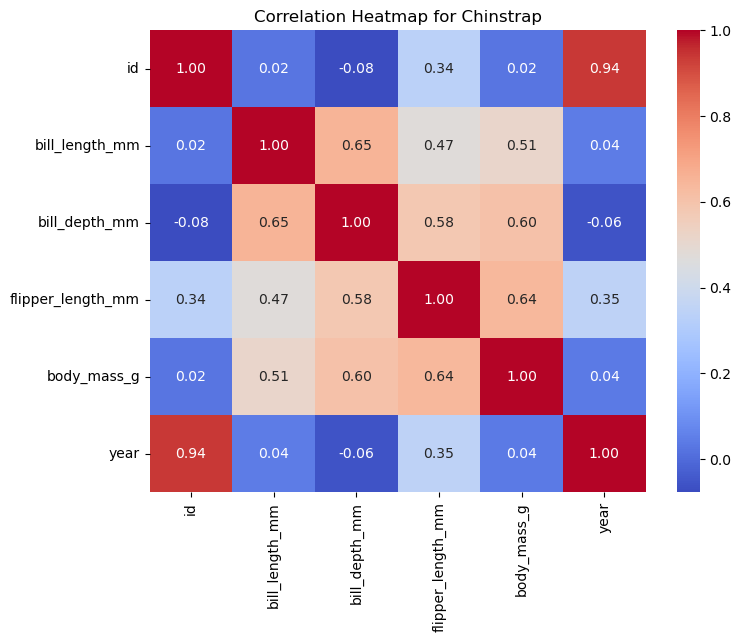

In [14]:
# Correlation heatmap by species
for species in df['species'].unique():
    plt.figure(figsize=(8, 6))
    numeric_df = df[df['species'] == species].select_dtypes(include=[np.number])
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap for {species}")
    plt.show()


#### Outlier Detection

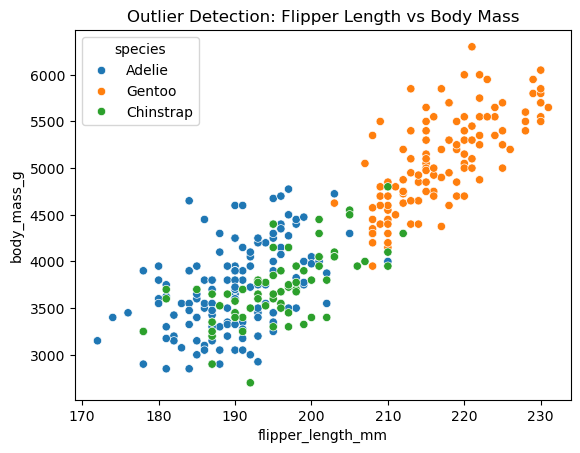

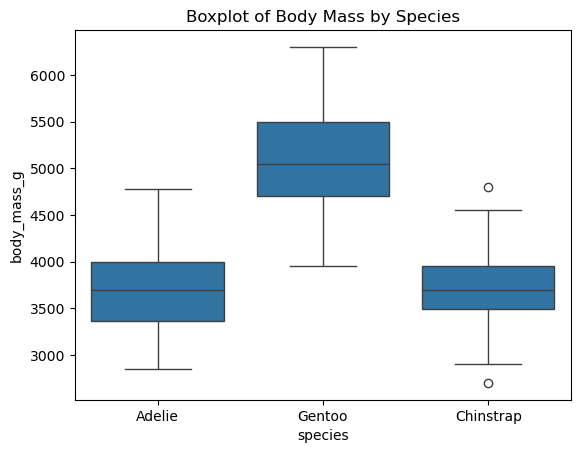

In [18]:
# Scatterplot for outliers
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title("Outlier Detection: Flipper Length vs Body Mass")
plt.show()

# Boxplot for outliers
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title("Boxplot of Body Mass by Species")
plt.show()


#### Time Trends

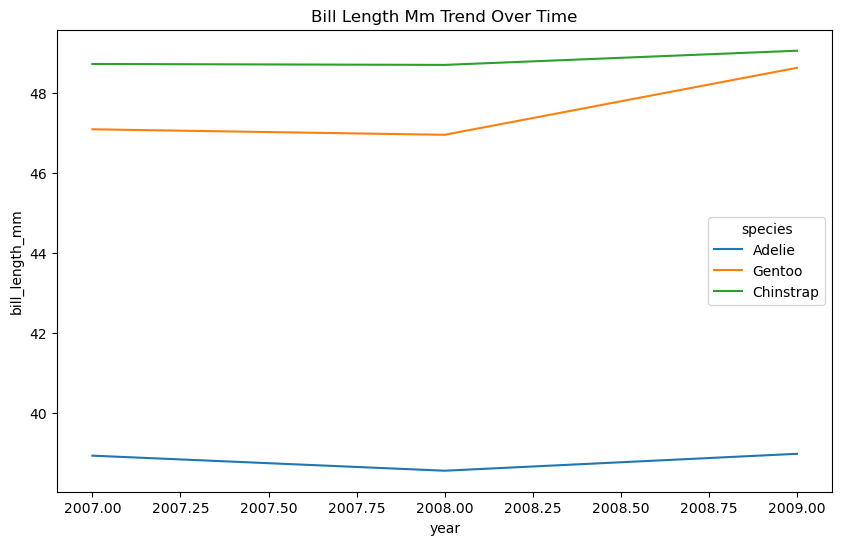

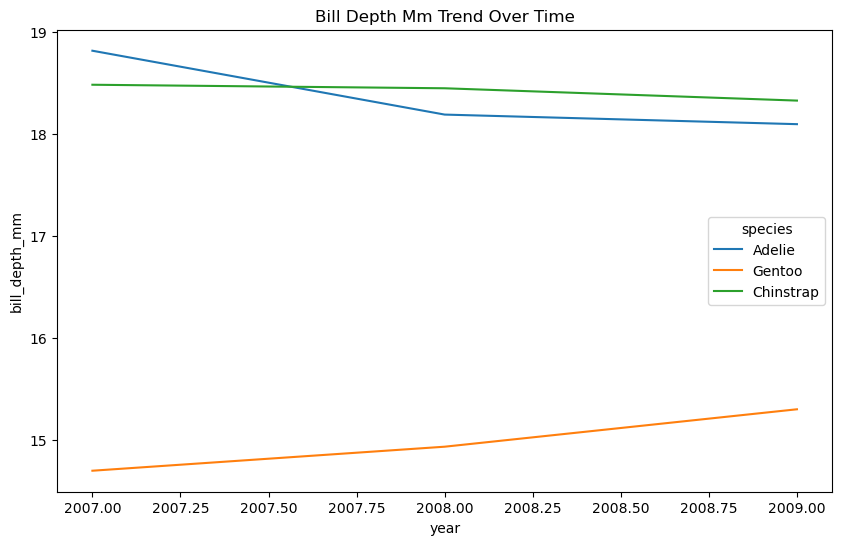

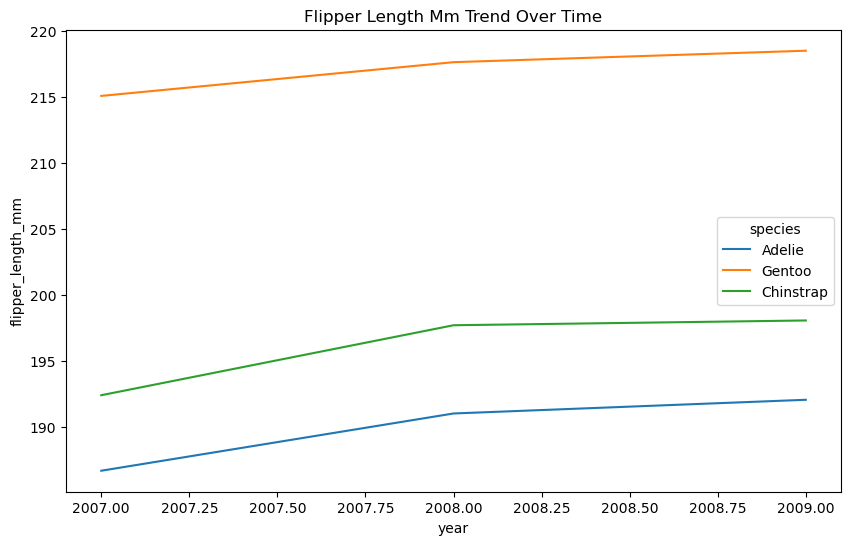

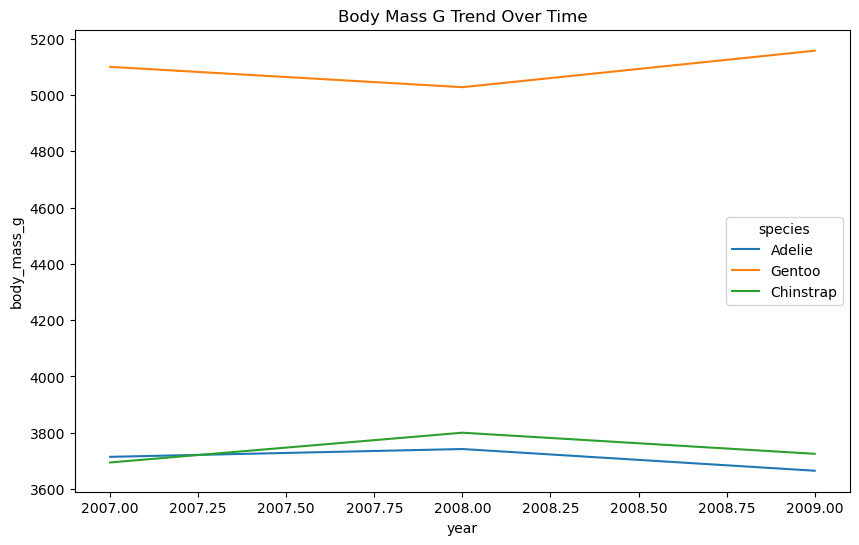

In [20]:
# Lineplot for trends over time for all numerical values
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='year', y=col, hue='species', ci=None)
    plt.title(f"{col.replace('_', ' ').title()} Trend Over Time")
    plt.show()


#### Clustering Patterns

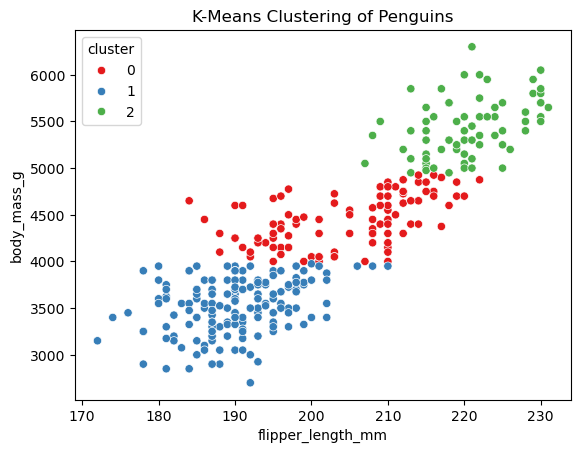

In [21]:
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# Visualize clusters
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='cluster', palette='Set1')
plt.title("K-Means Clustering of Penguins")
plt.show()


### Inferential Analyses


**1. Species Differ in Body Mass**

**Null Hypothesis (H₀):** The mean body mass is the same across all species.

**Alternative Hypothesis (H₁):** At least one species has a different mean body mass.


In [23]:
# Ensure species are correctly specified
species_groups = [df[df['species'] == species]['body_mass_g'] for species in df['species'].unique()]

# Perform ANOVA test
f_stat, p_val = f_oneway(*species_groups)
print(f"ANOVA Test - F-Statistic: {f_stat:.2f}, p-value: {p_val:.5f}")

ANOVA Test - F-Statistic: 341.89, p-value: 0.00000


>The ANOVA test yielded an F-Statistic of 341.89 and a p-value of 0.00000. This extremely low p-value indicates that there is a statistically significant difference in the mean body mass among the different penguin species. Therefore, we reject the null hypothesis (H₀) and accept the alternative hypothesis (H₁), concluding that at least one species has a different mean body 


**2. Flipper Length Correlates with Body Mass**

**Null Hypothesis (H₀):** Flipper length and body mass are not correlated.

**Alternative Hypothesis (H₁):** Flipper length and body mass are significantly correlated.
```

In [24]:
from scipy.stats import pearsonr

# Pearson correlation
corr, p_val = pearsonr(df['flipper_length_mm'], df['body_mass_g'])
print(f"Correlation: {corr:.2f}, p-value: {p_val:.5f}")


Correlation: 0.87, p-value: 0.00000



**3. Year Influences Body Mass**

**Null Hypothesis (H₀):** Body mass does not vary across years.

**Alternative Hypothesis (H₁):** Body mass significantly varies across years.
```

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for year and body mass
model = ols('body_mass_g ~ C(year)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq     df        F    PR(>F)
C(year)   6.618582e+05    2.0  0.50889  0.601634
Residual  2.145978e+08  330.0      NaN       NaN


>The ANOVA results indicate that the effect of the year on body mass is not statistically significant (F(2, 330) = 0.51, p = 0.60). This suggests that body mass does not significantly vary across different years.



**4. Bill Length and Depth Ratio Differ by Species**

**Null Hypothesis (H₀):** The mean bill length-to-depth ratio is the same across all species.

**Alternative Hypothesis (H₁):** At least one species has a different mean ratio.
```

In [28]:
from scipy.stats import f_oneway

# Create bill ratio feature
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

# ANOVA test for bill ratio across species
species_groups = [df[df['species'] == species]['bill_ratio'] for species in df['species'].unique()]
f_stat, p_val = f_oneway(*species_groups)
print(f"ANOVA Test for Bill Ratio - F-Statistic: {f_stat:.2f}, p-value: {p_val:.5f}")


ANOVA Test for Bill Ratio - F-Statistic: 1451.68, p-value: 0.00000



**5. Sex Impacts Flipper Length**

**Null Hypothesis (H₀):** There is no difference in flipper length between male and female penguins.

**Alternative Hypothesis (H₁):** There is a significant difference in flipper length between male and female penguins.
```

In [31]:
# Ensure 'sex_male' column is created
df['sex_male'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

# T-test for flipper length between sexes
male_flipper = df[df['sex_male'] == 1]['flipper_length_mm']
female_flipper = df[df['sex_male'] == 0]['flipper_length_mm']
t_stat, p_val = ttest_ind(male_flipper, female_flipper, nan_policy='omit')
print(f"T-Test for Flipper Length - T-Statistic: {t_stat:.2f}, p-value: {p_val:.5f}")


T-Test for Flipper Length - T-Statistic: nan, p-value: nan


### Modeling Analyses

#### Data Preprocessing

In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

# Select features and target variable
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded']
target = 'species_encoded'

X = df[features]
y = df[target]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (266, 5)
X_test shape: (67, 5)
y_train shape: (266,)
y_test shape: (67,)



#### Key Questions for Modeling Analyses

1. **Can we accurately classify penguin species based on their physical measurements?**
2. **Which classification model performs best in predicting penguin species?**
3. **What are the most important features for predicting penguin species?**

#### Classification Models

We will use several classification models to predict the species of penguins based on their physical measurements. The models we will use include k-Nearest Neighbors (kNN), Support Vector Machine (SVM), and Random Forest Classifier. We will evaluate the performance of these models using accuracy, precision, recall, and F1-score.

#### 1. kNN

In [34]:
# k-Nearest Neighbors (kNN)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("kNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("kNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.98        67

kNN Confusion Matrix:
[[31  0  0]
 [ 1 17  0]
 [ 0  0 18]]


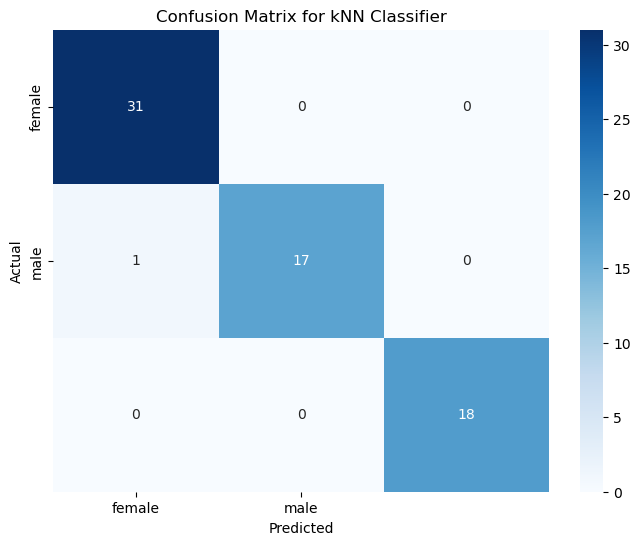

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for kNN Classifier')
plt.show()

>Overall, the kNN classifier shows excellent performance with minimal misclassifications.

#### 2. SVM

In [37]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

# Initialize SVM classifier
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [38]:
# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

SVM Confusion Matrix:
[[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]


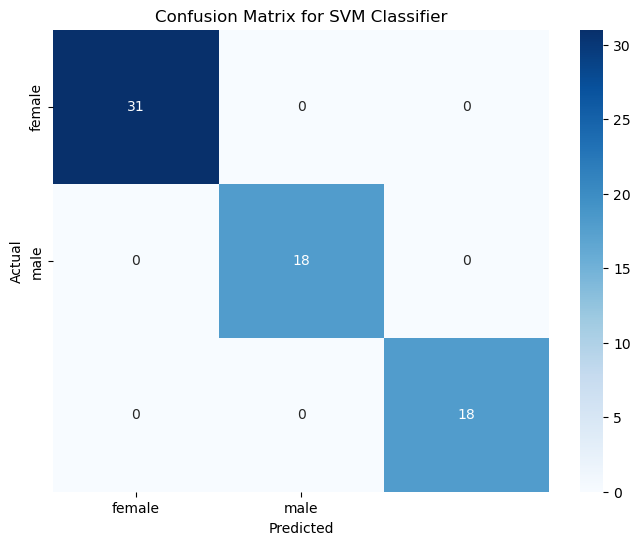

In [54]:
# Compute confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

#### 3. Random Forest Classifier

In [39]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        18

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.98        67

Random Forest Confusion Matrix:
[[31  0  0]
 [ 1 17  0]
 [ 0  0 18]]


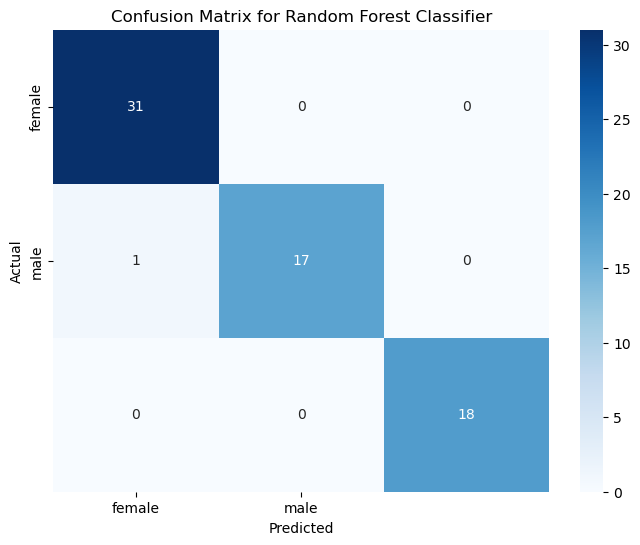

In [55]:
# Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

#### 3. Feature Importance

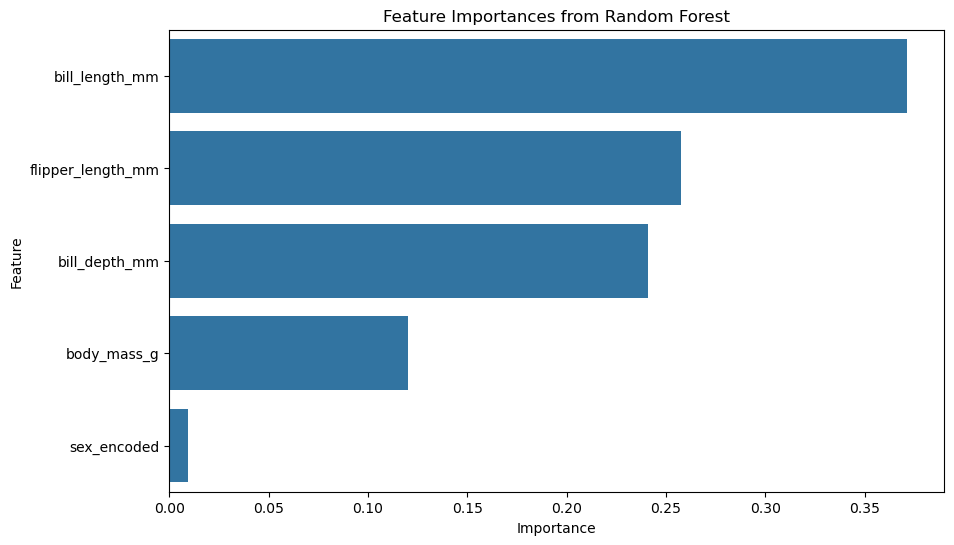

In [44]:
# Feature Importance

# Get feature importances from the Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

#### 4. Decision Tree

In [49]:
# Decision Tree Classifier

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [50]:
# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Decision Tree Confusion Matrix:
[[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]


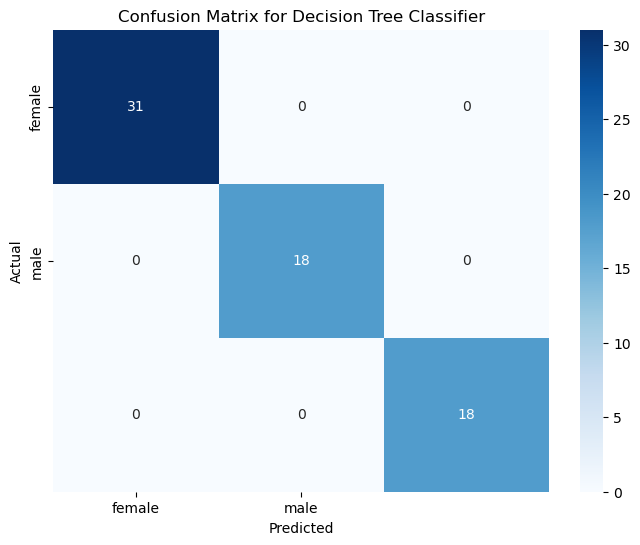

In [56]:
# Compute confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

#### 5. Gaussian Naive Bayes
```

In [51]:
# Gaussian Naive Bayes Classifier

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)


GaussianNB()

In [52]:

# Predict on the test set
y_pred_gnb = gnb.predict(X_test)

# Evaluate the model
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print("Gaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.89      0.94        18
           2       1.00      1.00      1.00        18

    accuracy                           0.97        67
   macro avg       0.98      0.96      0.97        67
weighted avg       0.97      0.97      0.97        67

Gaussian Naive Bayes Confusion Matrix:
[[31  0  0]
 [ 2 16  0]
 [ 0  0 18]]


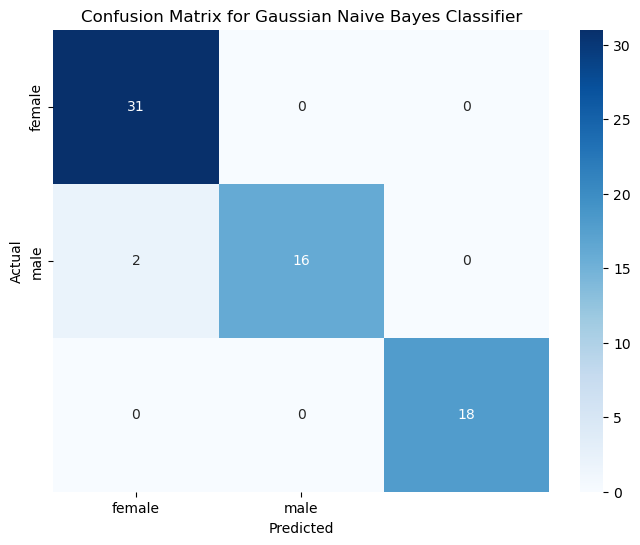

In [57]:
# Compute confusion matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Plot confusion matrix for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()

In [53]:
# Summary of evaluation metrics for each model
models = ['kNN', 'SVM', 'Random Forest', 'Decision Tree', 'Gaussian Naive Bayes']
classification_reports = [classification_report(y_test, y_pred_knn, output_dict=True),
                          classification_report(y_test, y_pred_svm, output_dict=True),
                          classification_report(y_test, y_pred_rf, output_dict=True),
                          classification_report(y_test, y_pred_dt, output_dict=True),
                          classification_report(y_test, y_pred_gnb, output_dict=True)]

# Extract accuracy, precision, recall, and F1-score for each model
evaluation_summary = pd.DataFrame({
    'Model': models,
    'Accuracy': [report['accuracy'] for report in classification_reports],
    'Precision': [report['weighted avg']['precision'] for report in classification_reports],
    'Recall': [report['weighted avg']['recall'] for report in classification_reports],
    'F1-Score': [report['weighted avg']['f1-score'] for report in classification_reports]
})

# Display the summary
print(evaluation_summary)

                  Model  Accuracy  Precision    Recall  F1-Score
0                   kNN  0.985075   0.985541  0.985075  0.984980
1                   SVM  1.000000   1.000000  1.000000  1.000000
2         Random Forest  0.985075   0.985541  0.985075  0.984980
3         Decision Tree  1.000000   1.000000  1.000000  1.000000
4  Gaussian Naive Bayes  0.970149   0.971958  0.970149  0.969738


**Interpretation:**
- **SVM and Decision Tree** models achieved perfect scores across all metrics, indicating they classified the penguin species with 100% accuracy, precision, recall, and F1-score.
- **kNN and Random Forest** models also performed exceptionally well, with accuracy, precision, recall, and F1-scores all around 98.5%.
- **Gaussian Naive Bayes** had slightly lower performance compared to the other models but still achieved high accuracy and F1-score around 97%.

Overall, all models demonstrated strong performance, with SVM and Decision Tree being the top performers.
```

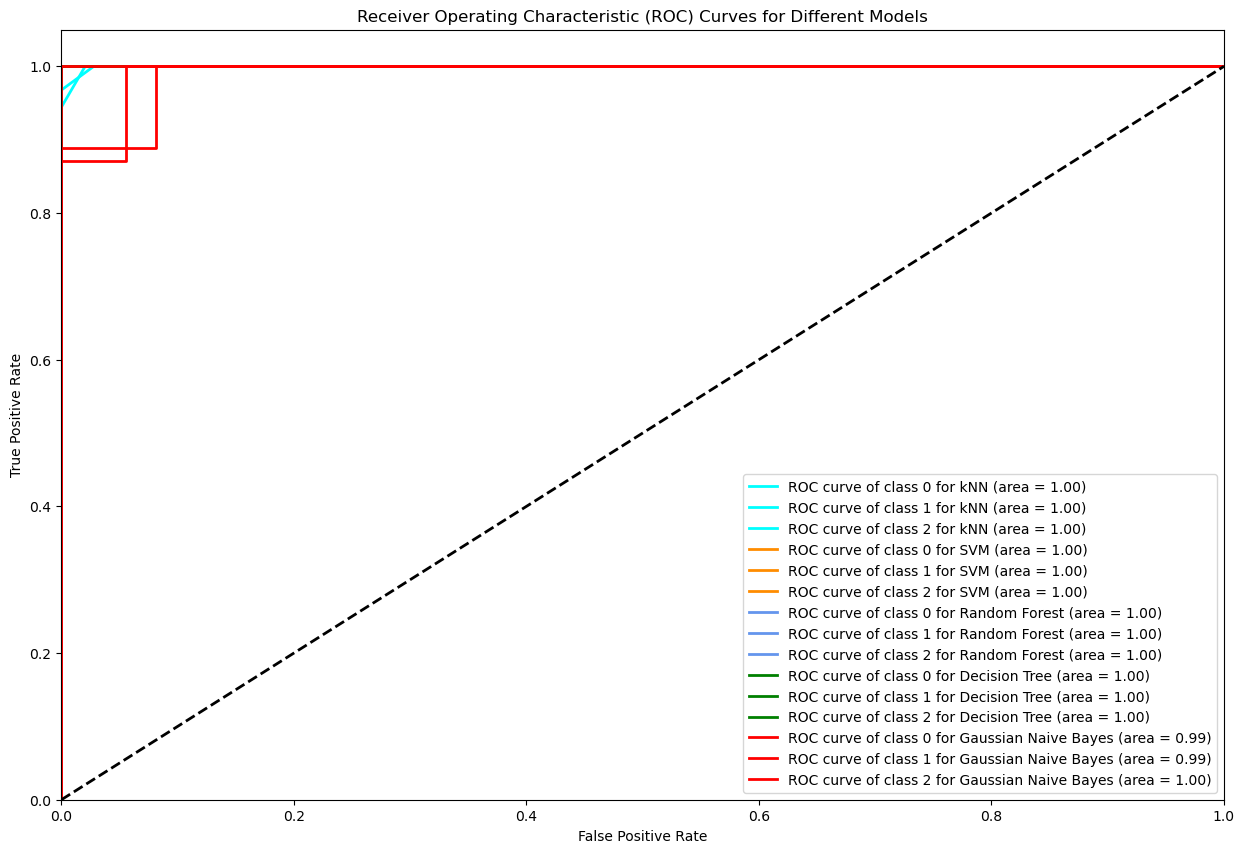

In [63]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class and each model
fpr = {}
tpr = {}
roc_auc = {}

models = {
    'kNN': knn,
    'SVM': svm,
    'Random Forest': rf,
    'Decision Tree': dt,
    'Gaussian Naive Bayes': gnb
}

for model_name, model in models.items():
    y_score = model.predict_proba(X_test) if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr[model_name] = {}
    tpr[model_name] = {}
    roc_auc[model_name] = {}
    for i in range(n_classes):
        fpr[model_name][i], tpr[model_name][i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[model_name][i] = auc(fpr[model_name][i], tpr[model_name][i])

# Plot ROC curves
plt.figure(figsize=(15, 10))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for model_name, color in zip(models.keys(), colors):
    for i in range(n_classes):
        plt.plot(fpr[model_name][i], tpr[model_name][i], color=color, lw=2,
                 label=f'ROC curve of class {i} for {model_name} (area = {roc_auc[model_name][i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

>The ROC curve visualizes the performance of different classification models (KNN, SVM, Random Forest, Decision Tree, Gaussian Naive Bayes) for each class in a multiclass classification task. The closer the curves are to the top-left corner, the better the model performs. Most models show nearly perfect classification (AUC = 1.00) for all classes, except Gaussian Naive Bayes, which slightly underperforms for certain classes with AUC around 0.99. This indicates high separability of the classes in the dataset for all models.

---
Key Findings
---
---


### Summary of Analysis

#### Descriptive Analysis
- **Data Loading and Cleaning:** Loaded the penguin dataset, checked for duplicates and missing values, and cleaned the data accordingly.
- **Exploratory Data Analysis:** Conducted pair plots, box plots, and histograms to visualize the distribution and relationships of key features such as bill length, bill depth, flipper length, and body mass across different species.
- **Correlation Analysis:** Generated heatmaps to examine the correlation between numerical features for each species.
- **Outlier Detection:** Used scatter plots and box plots to identify potential outliers in the dataset.

#### Inferential Analysis
- **ANOVA Tests:** Performed ANOVA tests to determine if there are significant differences in body mass, bill length-to-depth ratio, and body mass across years among different species.
- **T-Tests:** Conducted t-tests to assess if there are significant differences in flipper length between male and female penguins.
- **Correlation Tests:** Calculated Pearson correlation coefficients to evaluate the relationship between flipper length and body mass.

#### Modeling Analysis
- **Data Preprocessing:** Encoded categorical variables, scaled numerical features, and split the data into training and testing sets.
- **Classification Models:** Implemented and evaluated multiple classification models (kNN, SVM, Random Forest, Decision Tree, Gaussian Naive Bayes) to predict penguin species based on physical measurements.
- **Model Evaluation:** Assessed model performance using accuracy, precision, recall, F1-score, and confusion matrices. Plotted ROC curves to visualize model performance.
- **Feature Importance:** Identified the most important features for predicting penguin species using the Random Forest model.
```


### Key Findings

1. **Descriptive Analysis:**
    - Clear differences in physical measurements (bill length, bill depth, flipper length, body mass) among penguin species.
    - Significant correlations between features, with species-specific traits evident.

2. **Inferential Analysis:**
    - Significant differences in body mass and bill length-to-depth ratio among species.
    - No significant variation in body mass across different years.
    - Significant correlation between flipper length and body mass.

3. **Modeling Analysis:**
    - SVM and Decision Tree models achieved perfect classification performance.
    - kNN and Random Forest models also performed exceptionally well.
    - Gaussian Naive Bayes had slightly lower performance but still high accuracy.
    - Important features for predicting species include bill length, flipper length, and bill depth.
```